In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy import ndimage
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib.colors import hsv_to_rgb

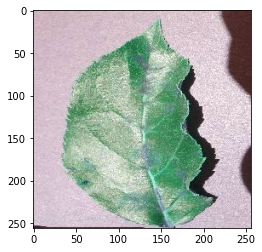

In [2]:
img = cv2.imread('./82f4f2fc-b28e-4834-95b8-3d7b144f8b15___FREC_Scab 3063.jpg')
plt.imshow(img)
plt.show()

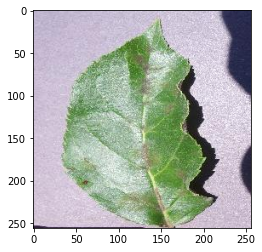

In [3]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

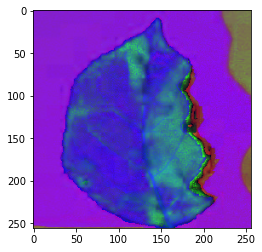

In [4]:
hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
plt.imshow(hsv_img)

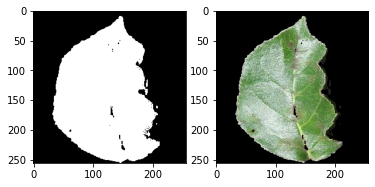

In [5]:
lower_green = np.array([25,0,20])
upper_green = np.array([100,255,255])
mask = cv2.inRange(hsv_img, lower_green, upper_green)
result = cv2.bitwise_and(img, img, mask=mask)
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

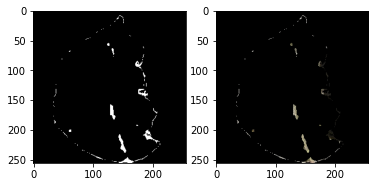

In [6]:
lower_brown = np.array([10,0,10])
upper_brown = np.array([30,255,255])
disease_mask = cv2.inRange(hsv_img, lower_brown, upper_brown)
disease_result = cv2.bitwise_and(img, img, mask=disease_mask)
plt.subplot(1, 2, 1)
plt.imshow(disease_mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(disease_result)
plt.show()

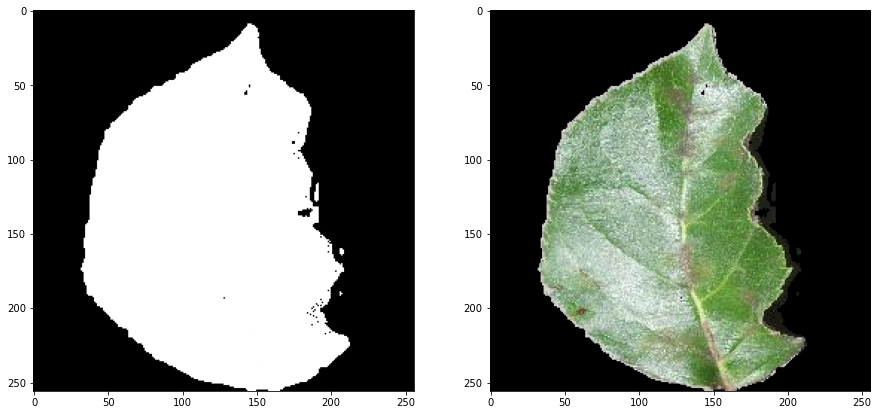

In [7]:
final_mask = mask + disease_mask
final_result = cv2.bitwise_and(img, img, mask=final_mask)
plt.figure(figsize=(15,15))
plt.subplot(1, 2, 1)
plt.imshow(final_mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(final_result)
plt.show()

In [8]:
sift =cv2.xfeatures2d.SIFT_create()

In [9]:
# Feature Descriptor
#OPENCV_ENABLE_NONFREE
sift = cv2.xfeatures2d.SIFT_create(400)
# Find keypoints and descriptors directly
kp, des = sift.detectAndCompute(final_result,None)
len(kp)

188

In [10]:
print(kp)

[<KeyPoint 000002D70360AD80>, <KeyPoint 000002D707EA12A0>, <KeyPoint 000002D707F19510>, <KeyPoint 000002D707F19090>, <KeyPoint 000002D707EAE570>, <KeyPoint 000002D707E322A0>, <KeyPoint 000002D707E7B090>, <KeyPoint 000002D707E7B1B0>, <KeyPoint 000002D704E1FDB0>, <KeyPoint 000002D704E1FE70>, <KeyPoint 000002D708040570>, <KeyPoint 000002D7080404B0>, <KeyPoint 000002D708040FC0>, <KeyPoint 000002D708040F90>, <KeyPoint 000002D708040150>, <KeyPoint 000002D708040540>, <KeyPoint 000002D7080401E0>, <KeyPoint 000002D707F1E480>, <KeyPoint 000002D707F1EC60>, <KeyPoint 000002D707FC59C0>, <KeyPoint 000002D707F10720>, <KeyPoint 000002D707F10A20>, <KeyPoint 000002D7733955D0>, <KeyPoint 000002D773395630>, <KeyPoint 000002D7733954B0>, <KeyPoint 000002D70804F7B0>, <KeyPoint 000002D70804F780>, <KeyPoint 000002D707FDEC90>, <KeyPoint 000002D707FDECC0>, <KeyPoint 000002D707FDEBA0>, <KeyPoint 000002D707FDEB70>, <KeyPoint 000002D70805EDB0>, <KeyPoint 000002D70805E390>, <KeyPoint 000002D70805EE10>, <KeyPoint 000

In [11]:
print(des)

[[  1.   0.   0. ...   0.   0.   0.]
 [139.   4.   0. ...   7.   1.   0.]
 [ 75.  16.   0. ...  22.   2.   2.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.  83.]
 [  0.   0.   0. ...  30.   4.   1.]]


In [12]:
img2 = cv2.drawKeypoints(final_result,kp,None,(255,0,0),4)

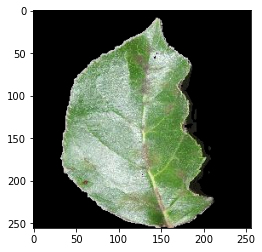

In [13]:
plt.imshow(final_result)


In [14]:
# global Feature
global_feature = des

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
rescaled_features = scaler.fit_transform(global_feature)

In [16]:
global_feature.shape

(188, 128)

In [17]:
sift.descriptorSize()

128

In [18]:
print("[STATUS] feature vector size {}".format(np.array(global_feature).shape))


[STATUS] feature vector size (188, 128)


In [19]:
a = global_feature
np.savetxt("doo.csv", a, delimiter=",")